In [3]:
import pandas as pd

# Cargar el archivo CSV
ruta_archivo = r"C:\Users\26wen\Desktop\IA-FINAL\Videojuegos.csv"
df = pd.read_csv(ruta_archivo)

# Ver las primeras filas del dataset
df.head()




,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players,Unnamed: 18
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1,NaN
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3,NaN
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5,NaN
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4,NaN
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1,NaN


In [4]:
# Información  dataset
df.info()

# Estadísticas columnas numéricas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  object 
 3   Price                    47774 non-null  float64
 4   Platform                 47774 non-null  object 
 5   Requires Special Device  47774 non-null  object 
 6   Developer                47774 non-null  object 
 7   Publisher                47774 non-null  object 
 8   Release Year             47774 non-null  int64  
 9   Genre                    47774 non-null  object 
 10  Multiplayer              47774 non-null  object 
 11  Game Length (Hours)      47774 non-null  float64
 12  Graphics Quality         47774 non-null  object 
 13  Soundtrack Quality       47774 non-null  object 
 14  Story Quality         

,User Rating,Price,Release Year,Game Length (Hours),Min Number of Players,Unnamed: 18
count,47774.000000,47774.000000,47774.000000,47774.000000,47774.000000,0.0
mean,29.719329,39.951371,2016.480952,32.481672,5.116758,NaN
std,7.550131,11.520342,4.027276,15.872508,2.769521,NaN
min,10.100000,19.990000,2010.000000,5.000000,1.000000,NaN
25%,24.300000,29.990000,2013.000000,18.800000,3.000000,NaN
50%,29.700000,39.845000,2016.000000,32.500000,5.000000,NaN
75%,35.100000,49.957500,2020.000000,46.300000,7.000000,NaN
max,49.500000,59.990000,2023.000000,60.000000,10.000000,NaN


In [5]:
# Clasificación  columnas
columnas_categoricas = ['Age Group Targeted', 'Platform', 'Requires Special Device',
                        'Developer', 'Publisher', 'Genre', 'Multiplayer',
                        'Graphics Quality', 'Soundtrack Quality', 'Story Quality', 'Game Mode']

columnas_numericas = ['Price', 'Release Year', 'Game Length (Hours)', 'Min Number of Players']

columnas_texto = ['User Review Text']


In [6]:
from sklearn.model_selection import train_test_split

# Definir  (X) y (y)
X = df.drop(columns=['User Rating'])
y = df['User Rating']

#  80% para entrenamiento, 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#  transformadores
transformador_categorico = OneHotEncoder(handle_unknown='ignore')
transformador_numerico = StandardScaler()

#  preprocesador
preprocesador = ColumnTransformer(
    transformers=[
        ('num', transformador_numerico, columnas_numericas),
        ('cat', transformador_categorico, columnas_categoricas)
    ])

# Ajustar y transformar los datos de entrenamiento
X_train_trans = preprocesador.fit_transform(X_train)
X_test_trans = preprocesador.transform(X_test)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train_trans, y_train)

# Predecir conjunto de prueba
y_pred = modelo.predict(X_test_trans)

# Evalua modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R2): {r2}")


Error Cuadrático Medio (MSE): 1.3406812055230128
Coeficiente de Determinación (R2): 0.9768468286667356


In [9]:
from sklearn.model_selection import cross_val_score

# alidación cruzada
scores = cross_val_score(modelo, X_train_trans, y_train, cv=5, scoring='r2')
print(f"Puntuación R2 promedio en validación cruzada: {scores.mean()}")


Puntuación R2 promedio en validación cruzada: 0.976241851069657


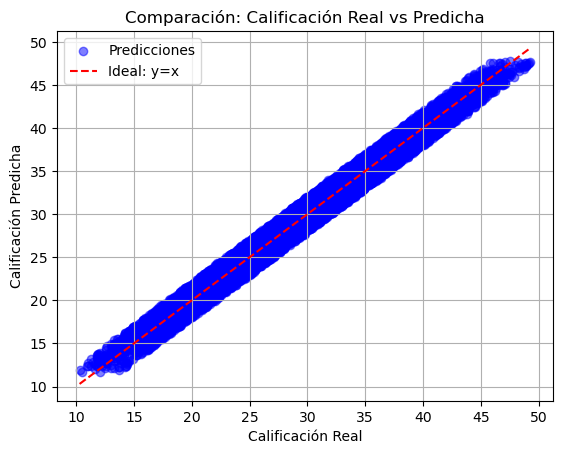

In [10]:
import matplotlib.pyplot as plt

# Gráfico de dispersión con línea de referencia
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicciones', color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal: y=x')
plt.xlabel("Calificación Real")
plt.ylabel("Calificación Predicha")
plt.title("Comparación: Calificación Real vs Predicha")
plt.legend()
plt.grid(True)
plt.show()



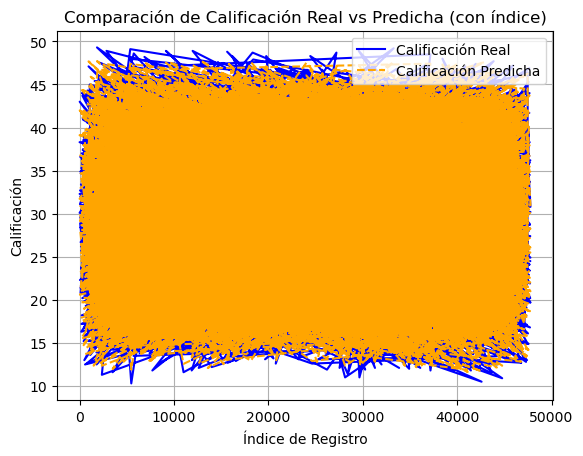

In [11]:
import matplotlib.pyplot as plt

# Crear el gráfico con el índice como eje X y las calificaciones reales y predichas en Y
plt.plot(y_test.index, y_test, label='Calificación Real', color='blue', linewidth=1.5)
plt.plot(y_test.index, y_pred, label='Calificación Predicha', color='orange', linestyle='dashed', linewidth=1.5)

plt.xlabel("Índice de Registro")  # Eje X
plt.ylabel("Calificación")        # Eje Y
plt.title("Comparación de Calificación Real vs Predicha (con índice)")
plt.legend()
plt.grid(True)
plt.show()


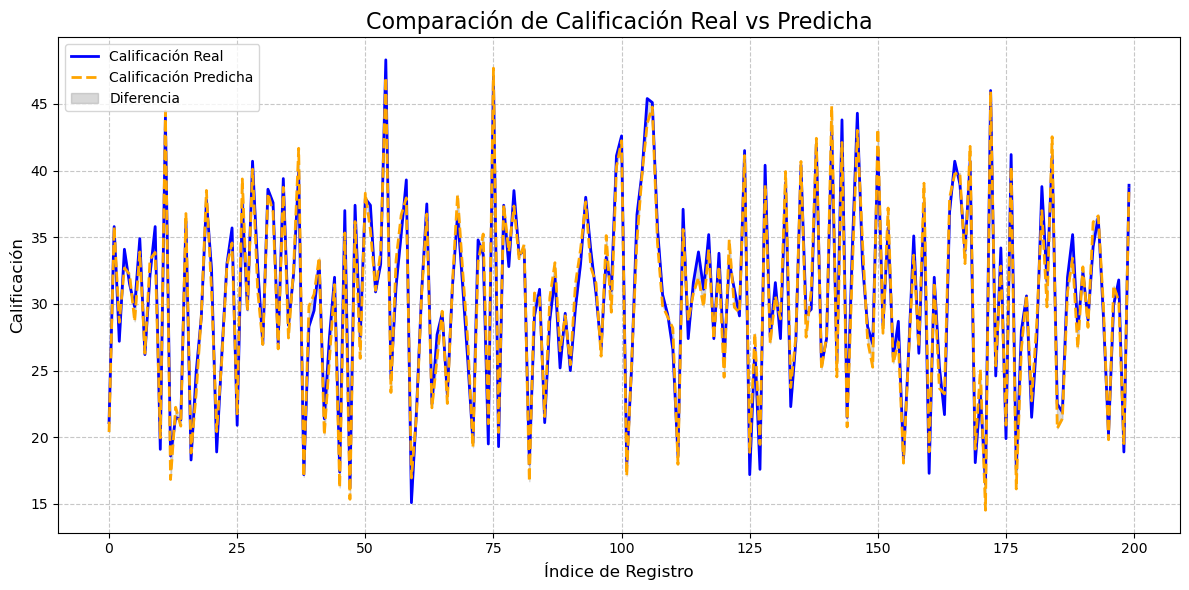

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar una muestra pequeña para visualizar mejor (por ejemplo, 200 registros)
n_samples = 200
y_test_sample = y_test[:n_samples]
y_pred_sample = y_pred[:n_samples]

# Crear la figura
plt.figure(figsize=(12, 6))

# Plotear Calificaciones Reales y Predichas
plt.plot(np.arange(n_samples), y_test_sample, label='Calificación Real', color='blue', linewidth=2)
plt.plot(np.arange(n_samples), y_pred_sample, label='Calificación Predicha', color='orange', linestyle='dashed', linewidth=2)

# Rellenar áreas para destacar diferencias
plt.fill_between(np.arange(n_samples), y_test_sample, y_pred_sample, color='gray', alpha=0.3, label='Diferencia')

# Etiquetas y título
plt.xlabel("Índice de Registro", fontsize=12)
plt.ylabel("Calificación", fontsize=12)
plt.title("Comparación de Calificación Real vs Predicha", fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

#  comparaciones
comparacion = pd.DataFrame({
    'Calificación Real': y_test,
    'Calificación Predicha': y_pred
})

# primeros datos
print(comparacion.head(10))


       Calificación Real  Calificación Predicha
20481               21.1              20.398991
21278               35.8              35.786892
37809               27.2              28.620879
34452               34.1              32.697358
35793               31.5              32.226038
13019               29.8              28.698672
20091               34.9              33.899044
5762                26.2              26.303366
4524                32.2              33.345095
35961               35.8              33.857190


In [ ]:
import pandas as pd


comparacion = pd.DataFrame(X_test)  #  X_test  conjunto de características
comparacion['Calificación Real'] = y_test
comparacion['Calificación Predicha'] = y_pred

# primeras filas
print(comparacion.head(10))


                                    Game Title Age Group Targeted  Price  \
20481                               The Sims 4           All Ages  30.35   
21278                        Bioshock Infinite             Adults  56.70   
37809                       Kingdom Hearts III             Adults  44.17   
34452            Animal Crossing: New Horizons               Kids  32.23   
35793                          Half-Life: Alyx               Kids  40.79   
13019                                  Cuphead           All Ages  42.24   
20091                            Rocket League               Kids  43.41   
5762                                   FIFA 24               Kids  41.31   
4524   The Legend of Zelda: Breath of the Wild               Kids  47.44   
35961                       Grand Theft Auto V           All Ages  44.40   

              Platform Requires Special Device       Developer  \
20481  Nintendo Switch                      No          Bungie   
21278             Xbox         